In [1]:
#Import the necessary library
import nltk
import pandas as pd

In [2]:
#Import games review data
reviews = pd.read_csv('game_reviews.csv')

reviews.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [3]:
reviews.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
image             object
dtype: object

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [5]:
#Extract reviews only column from DataFrame
textonly = reviews.filter(['reviewText'])
textonly.head()

,reviewText
0,"When it comes to a DM's screen, the space on t..."
1,An Open Letter to GaleForce9*:\n\nYour unpaint...
2,"Nice art, nice printing. Why two panels are f..."
3,Amazing buy! Bought it as a gift for our new d...
4,As my review of GF9's previous screens these w...


In [6]:
textonly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  14990 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


In [7]:
#Dropping null rows
textonly.dropna(inplace=True)

In [8]:
textonly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  14990 non-null  object
dtypes: object(1)
memory usage: 234.2+ KB


In [9]:
#Exploring the data
textonly.dtypes

reviewText    object
dtype: object

In [10]:
#Convert column type to string for analysis 
textonly["reviewText"] = textonly["reviewText"].astype("string")

In [11]:
textonly.dtypes

reviewText    string
dtype: object

In [12]:
#Removing punctuation marks from data
import re

#Create function to clean text
def cleanTxt(text):
    text = re.sub(r'[\.\?\!\,\:\;\"\*\'\-]', '', text)
    return text

textonly['reviewText'] = textonly['reviewText'].apply(cleanTxt)

#Show the cleaned text
print(textonly)

                                              reviewText
0      When it comes to a DMs screen the space on the...
1      An Open Letter to GaleForce9\n\nYour unpainted...
2      Nice art nice printing  Why two panels are fil...
3      Amazing buy Bought it as a gift for our new dm...
4      As my review of GF9s previous screens these we...
...                                                  ...
14995  Garbage  Broke after 1 use  Absolutely ridicul...
14996  Our granddaughter loves these as part of her b...
14997  Got water in it after the first use Shorted ou...
14998                 I like print vs digital scheduling
14999  This has been our lifesaver Our 1 year old boy...

[14990 rows x 1 columns]


In [13]:
#CONVERTING THE SENTENCES TO LOWER CASE
textonly['reviewText'] = textonly['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
textonly['reviewText'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [14]:
#CHECKING FOR DUPLICATES
textonly.reviewText.duplicated().sum()

912

In [15]:
#Dropping the duplicated text
textonly.reviewText.drop_duplicates()

0        when it comes to a dms screen the space on the...
1        an open letter to galeforce9 your unpainted mi...
2        nice art nice printing why two panels are fill...
3        amazing buy bought it as a gift for our new dm...
4        as my review of gf9s previous screens these we...
                               ...                        
14995    garbage broke after 1 use absolutely ridiculou...
14996    our granddaughter loves these as part of her b...
14997    got water in it after the first use shorted ou...
14998                   i like print vs digital scheduling
14999    this has been our lifesaver our 1 year old boy...
Name: reviewText, Length: 14078, dtype: object

In [16]:
#Convert column type to string for analysis 
textonly["reviewText"] = textonly["reviewText"].astype("string")

In [17]:
#Exploring the data
textonly.dtypes

reviewText    string
dtype: object

In [18]:
# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
#Tokenize data into sentences
sent_tok = []
for sent in textonly.reviewText:
    sent = sent_tokenize(sent)
    sent_tok.append(sent)
    

In [20]:
sent_tok

[['when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely'],
 ['an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map w

In [21]:
#Tokenize data into words
word_tok = []
for words in textonly.reviewText:
    words = word_tokenize(words)
    word_tok.append(words)

In [22]:
word_tok

[['when',
  'it',
  'comes',
  'to',
  'a',
  'dms',
  'screen',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  'the',
  'fact',
  'that',
  '50',
  '%',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  '(',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  ')',
  'makes',
  'it',
  'completely',
  'useless',
  'the',
  'only',
  'reason',
  'that',
  'i',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  'technically',
  'speaking',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  'other',
  'than',
  'that',
  'it',
  'drops',
  'the',
  'ball',
  'completely'],
 ['an',
  'open',
  'letter',
  'to',
  'galeforce9',
  'your',
  'unpainted',
  'miniatures',
  'are',
  'very',
  'not',
  'bad',
  'your',
  'spell',
  'cards',
  'are',
 

In [23]:
##Create an empty string variable
all_comments = ''
for i in range(textonly.shape[0]):
    all_comments = all_comments + textonly['reviewText'][1] 

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Set colours for wordcloud
sns.set(color_codes=True)
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(all_comments)

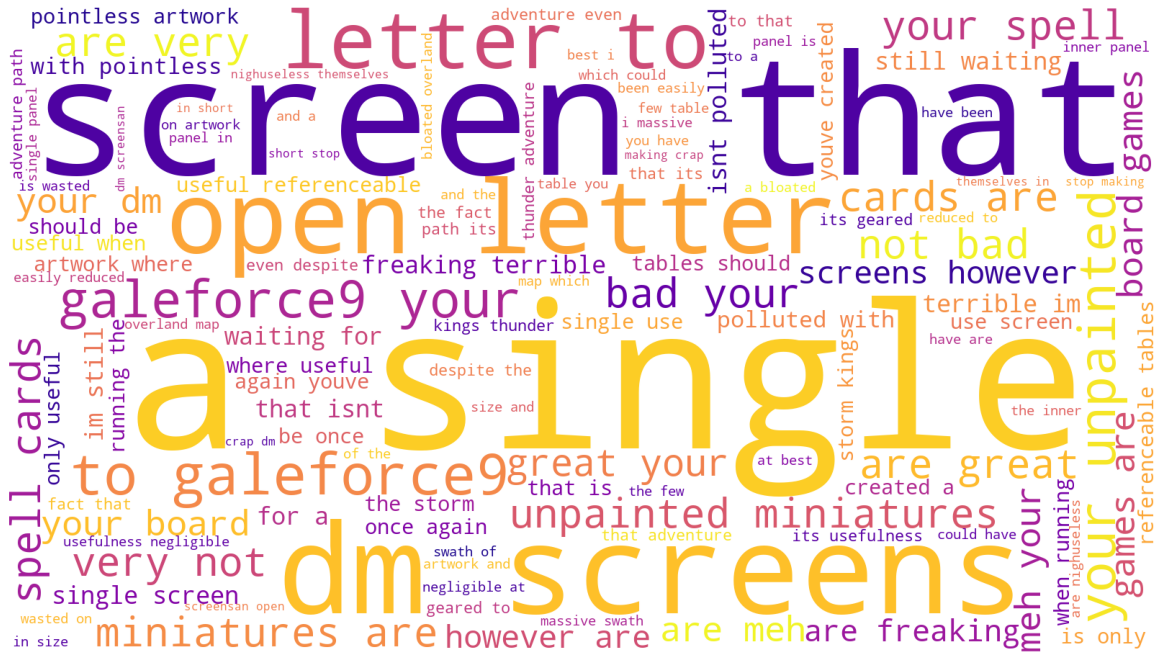

In [26]:
#generate wordcloud
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Observations: Stop words are some of the largest words in cloud. Words appear to be in sentence segments rather than words on their own, so data needs to be word tokenized. Word cloud doesn't appear to convey any positive or  negative sentiment in the larger words but can be seen in smaller words.

In [27]:
#Tokenize the words
textonly['tokens'] = textonly['reviewText'].apply(word_tokenize)

#Preview results    
textonly['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [28]:
stopwords=set(stopwords.words('english'))

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

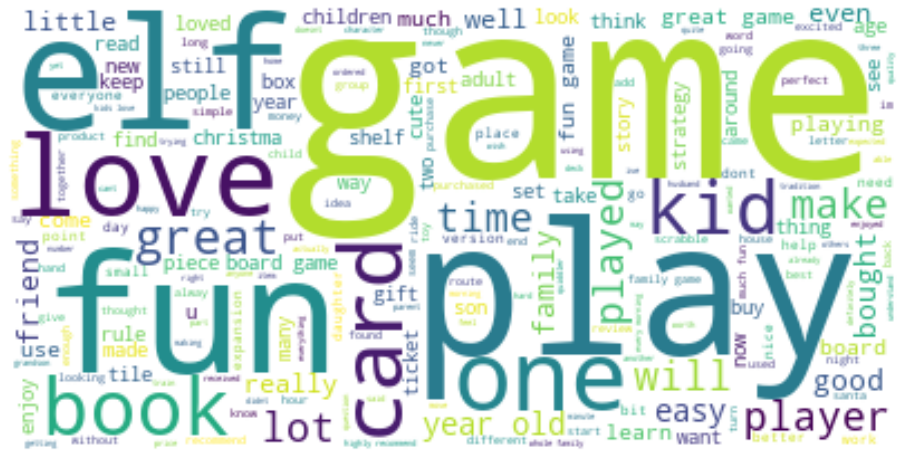

In [31]:
#Create a wordcloud without stopwords
#Putting stopwords = none removes stopwords from text

text = " ".join(i for i in textonly.reviewText)
stopwords = set('stopwords')
wordcloud = WordCloud(stopwords=None, background_color="white").generate(text)
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Removing the stopwords has enabled me to identify words/phrases used to describe 

In [32]:
# Install vaderSentiment tool
!pip install VaderSentiment

# Import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [33]:
# Install TextBlob
!pip install textblob

# Import
from textblob import TextBlob

In [34]:
#Generate the polarity score
#Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

#Populate a new column with polarity scores for each comment.
textonly['polarity'] = textonly['reviewText'].apply(generate_polarity)

#Preview the result.
textonly['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

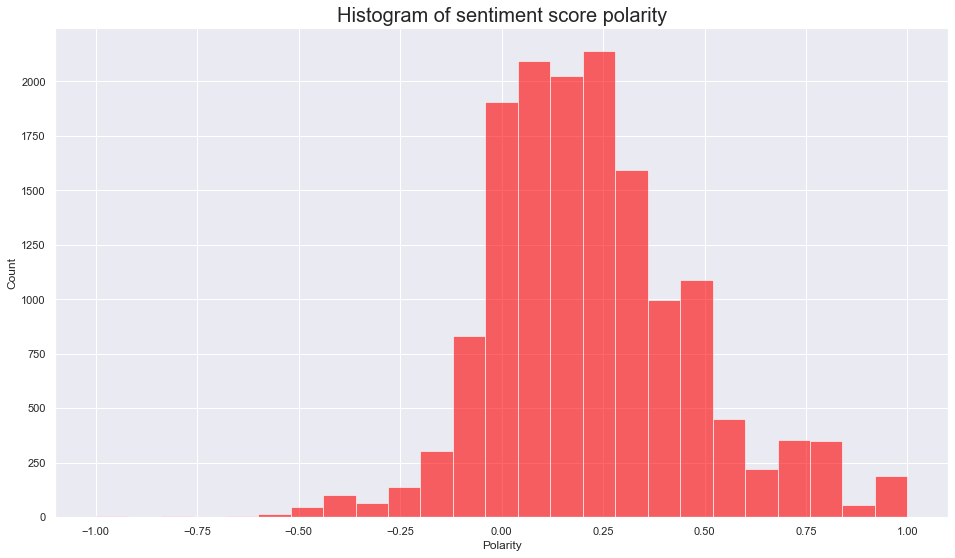

<Figure size 432x288 with 0 Axes>

In [35]:
#Create a histogram of polarity for me to read and interpret

num_bins = 25
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(textonly['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();
plt.savefig('Sentiment Score Polarity.png')

In [36]:
#Top 20 positive reviews
positive_sentiment = textonly.nlargest(20, 'polarity')

positive_sentiment

,reviewText,tokens,polarity
7,came in perfect condition,"[came, in, perfect, condition]",1.0
165,awesome book,"[awesome, book]",1.0
194,awesome gift,"[awesome, gift]",1.0
496,excellent activity for teaching selfmanagement...,"[excellent, activity, for, teaching, selfmanag...",1.0
524,perfect just what i ordered,"[perfect, just, what, i, ordered]",1.0
591,wonderful product,"[wonderful, product]",1.0
609,delightful product,"[delightful, product]",1.0
621,wonderful for my grandson to learn the resurre...,"[wonderful, for, my, grandson, to, learn, the,...",1.0
790,perfect,[perfect],1.0
933,awesome,[awesome],1.0


In [37]:
positive_sentiment.to_csv(r'C:\Users\Akira\Desktop\LSE\R\Assignment 3\positive_sentiment.csv', index=False)


Based on the top 20 positive reviews, customers enjoyed the products, felt the quality of the producst were high, that their loved ones enjoyed the products and encouraged other shoppers to purchase more than one of certain items if possible.

In [38]:
#Top 20 lowest reviews

negative_sentiment = textonly.nsmallest(20, 'polarity')

negative_sentiment

,reviewText,tokens,polarity
208,booo unles you are patient know how to measure...,"[booo, unles, you, are, patient, know, how, to...",-1.000000
2043,kids did not like it thought it was boring,"[kids, did, not, like, it, thought, it, was, b...",-1.000000
3359,some of the suggestions are disgusting,"[some, of, the, suggestions, are, disgusting]",-1.000000
8319,awful we did not receive what was advertised w...,"[awful, we, did, not, receive, what, was, adve...",-1.000000
7988,was the elf on the shelf but it didnt have the...,"[was, the, elf, on, the, shelf, but, it, didnt...",-0.975000
9511,i havent even taken it out of the box yet but ...,"[i, havent, even, taken, it, out, of, the, box...",-0.975000
8758,i hate the holidays bcuz of the elf he was dis...,"[i, hate, the, holidays, bcuz, of, the, elf, h...",-0.866667
13181,i do not under stand how you keep score or rea...,"[i, do, not, under, stand, how, you, keep, sco...",-0.800000
9143,cliche and stupid i should not drink and amazon,"[cliche, and, stupid, i, should, not, drink, a...",-0.800000
9260,just stupid,"[just, stupid]",-0.800000


In [39]:
negative_sentiment.to_csv(r'C:\Users\Akira\Desktop\LSE\R\Assignment 3\negative_sentiment.csv', index=False)

According to the negative reviews, the products were not as advertised, were bad quality, and were confusing to use as well as infuriating in social situations